In [1]:
### manipulate data

import pandas as pd




# carga de datas

datas = pd.read_csv(
    #r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\output_nov.csv"
    r"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/output_nov.csv"
)
# convertir en dataframe
df = pd.DataFrame(datas)
df.head()


,docdate,AUAC265,AUAC3-4-1,AUAC4010,AUACAC24NE600,AUACAC24NE,AUACAE15,AUACAE20,AUACAE25,AUACAE30,...,SOSWSWT3545A,SOSWSWW2060N,SOSWSWW2550,SOSWSWW2760,SOSWSWW3552,SOSWSWW4070MV,SOSWSWW5070MV,SOSWT1-111,SOSWT1-112,SOSWT1-115
0,2022-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
1,2022-01-04,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-01-05,1,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,2,0,0
3,2022-01-06,0,0,0,0,0,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4,2022-01-07,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# filter since 2023-01-01

dff2023 = df[df["docdate"] >= "2023-01-01"]

dff2023.shape
len(dff2023.notnull().sum())

# Count number of zeros in all columns of Dataframe
for col in dff2023.columns:
    column = dff2023[col]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    print("Count of zeros in column ", col, " is : ", count)

Count of zeros in column  docdate  is :  0
Count of zeros in column  AUAC265  is :  373
Count of zeros in column  AUAC3-4-1  is :  432
Count of zeros in column  AUAC4010  is :  516
Count of zeros in column  AUACAC24NE600  is :  432
Count of zeros in column  AUACAC24NE  is :  522
Count of zeros in column  AUACAE15  is :  497
Count of zeros in column  AUACAE20  is :  295
Count of zeros in column  AUACAE25  is :  431
Count of zeros in column  AUACAE30  is :  145
Count of zeros in column  AUACAF24Li  is :  501
Count of zeros in column  AUACAF31C  is :  512
Count of zeros in column  AUACAH45  is :  315
Count of zeros in column  AUACAL3900U  is :  347
Count of zeros in column  AUACALH2  is :  299
Count of zeros in column  AUACALK4  is :  529
Count of zeros in column  AUACALM4  is :  170
Count of zeros in column  AUACALR4  is :  280
Count of zeros in column  AUACALS4  is :  214
Count of zeros in column  AUACAN4275  is :  440
Count of zeros in column  AUACAP40  is :  503
Count of zeros in colu

In [4]:
#Crear grupos


data = dff2023.copy()
data.head()
# check null values
data.isnull().sum()


docdate          0
AUAC265          0
AUAC3-4-1        0
AUAC4010         0
AUACAC24NE600    0
                ..
SOSWSWW4070MV    0
SOSWSWW5070MV    0
SOSWT1-111       0
SOSWT1-112       0
SOSWT1-115       0
Length: 449, dtype: int64

In [8]:
# review zeros values


values_list = ((data.isin([0]).sum(axis=1)) / len(data)) * 100
values_list

# created a separation with percentage of zeros values

datahigh = []
datamedium = []
datalow = []

for col in data.columns:
    missing_percentage = (data[col][data[col]==0].count()) / len(data) * 100
    if missing_percentage < 30.0:
        datahigh.append(col)
    elif missing_percentage < 50.0:
        datamedium.append(col)
    else:
        datalow.append(col)

# check selections of dataset
datahigh, datamedium, datalow

len(datahigh), len(datamedium), len(datalow)


(21, 58, 370)

In [9]:
#========================================================================================================================================
# Series con demanda media
#========================================================================================================================================

dtmedium_dda = dff2023[['docdate', 'AUACALM4','AUACALS4','AUACBD850','AUACEG250','AUACSC901','AUELCR433','AUELMC5','HEELAG114',
                     'HEELAG1165','HEELAIRKIT5','HEELCA1024S','HEELCA6205','HEELCHS16','HEELEB7056','HEELEB90758','HEELEP181',
                     'HEELHG1600','HEELID600','HEELPS250','HEELPS350','HEELPW1565','HEELPW2275','HEELRM9026','HEELSP500',
                     'HEELVC0115P','HEELVC0640P','HEELVC2525P','HEELXAG20','HEFUFC25','HEFUFCD10','HEFUFHG18','SOELCSVM510',
                     'SOELCSVM760','SOELPES6300','SOELPMS6505','SOELSI7130MP','SOELSI7150DV','SOELSI7160XP','SOELSI7200XP',
                      'SOELSI8180MP','SOELSI9180DV','SOELSI9220DV','SOFUFW125','SOFUFW161M','SOSWC1-611','SOSWC1-651',
                      'SOSWC1-811','SOSWG2-210','SOSWG2-214','SOSWM1-111','SOSWM3-215','SOSWM3-315','SOSWM3-317','SOSWP2-511',
                      'SOSWP2-513','SOSWP2-514','SOSWP2-516','SOSWSWA153N']]
dtmedium_dda


#-- EDA
dtmedium_dda.describe().T

,count,mean,std,min,25%,50%,75%,max
AUACALM4,552.0,16.195652,42.610652,-18.0,0.0,3.0,10.25,569.0
AUACALS4,552.0,17.123188,41.241347,-18.0,0.0,2.0,11.00,350.0
AUACBD850,552.0,3.106884,8.620523,-20.0,0.0,1.0,2.00,79.0
AUACEG250,552.0,2.278986,5.369308,-10.0,0.0,1.0,2.00,74.0
AUACSC901,552.0,4.931159,15.786080,-8.0,0.0,1.0,4.00,310.0
AUELCR433,552.0,7.956522,16.280490,0.0,0.0,2.0,9.00,128.0
AUELMC5,552.0,1.742754,3.248753,0.0,0.0,1.0,2.00,31.0
HEELAG114,552.0,9.378623,26.658010,-2.0,0.0,2.0,7.00,302.0
HEELAG1165,552.0,6.505435,13.464208,-2.0,0.0,2.0,6.00,123.0
HEELAIRKIT5,552.0,1.431159,3.355355,-1.0,0.0,1.0,2.00,52.0


In [5]:
#========================================================================================================================================
# Series con mayor demanda
#========================================================================================================================================

dthigd_dda = dff2023[['docdate', 'AUACAE30', 'AUACPB400', 'AUACRIM4F', 'AUACSH1000', 'HEELAG1141', 'HEELAG1142KIT', 'HEELPW1770', 
                 'HEELXID20', 'HEFUFCD12KIT', 'HEFUFCD21', 'HEFUFD52', 'HEFUFG71', 'SOELCSVM501', 'SOELCSVM530', 'SOELSI6140DV', 
                 'SOFUFW181', 'SOFUFW185', 'SOFUFW33', 'SOFUFW35', 'SOSWP2-517']]
dthigd_dda


#-- EDA
dthigd_dda.describe().T

,count,mean,std,min,25%,50%,75%,max
AUACAE30,552.0,5.402174,9.939811,-2.0,0.0,2.0,5.00,101.0
AUACPB400,552.0,4.684783,7.261908,-1.0,1.0,2.0,6.00,73.0
AUACRIM4F,552.0,38.778986,59.333366,-27.0,5.0,20.0,47.25,440.0
AUACSH1000,552.0,8.753623,18.728866,-5.0,0.0,2.0,11.00,289.0
HEELAG1141,552.0,5.842391,10.842821,-1.0,1.0,2.0,6.25,106.0
HEELAG1142KIT,552.0,14.668478,26.938672,-5.0,2.0,7.0,17.00,342.0
HEELPW1770,552.0,5.661232,13.181523,-7.0,0.0,2.0,5.00,132.0
HEELXID20,552.0,5.213768,8.465021,-2.0,1.0,3.0,6.00,106.0
HEFUFCD12KIT,552.0,17.190217,35.951899,-7.0,1.0,4.0,16.00,380.0
HEFUFCD21,552.0,22.735507,61.543153,-106.0,1.0,4.0,17.00,607.0


In [6]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df=dthigd_dda, date = 'docdate', y = 'AUACAE30'):
    df_m = df[[date, y]]
    df_m.rename(columns={date : 'ds', y :'y'}, inplace=True)
    df_m['unique_id'] = y
    return df_m

df_m = data_sf(df=dthigd_dda, date = 'docdate', y = 'AUACAE30')
df_m
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 301 to 852
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         552 non-null    object
 1   y          552 non-null    int64 
 2   unique_id  552 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.2+ KB


/tmp/ipykernel_12859/2851658874.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m.rename(columns={date : 'ds', y :'y'}, inplace=True)
/tmp/ipykernel_12859/2851658874.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['unique_id'] = y


In [7]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos

from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

#-- Parametros

# Número de días en el futuro a pronosticar
horizon = 30
# Ventana estacional: es 7 porque tenemos datos diarios
season_length = 7
# El número de dias que el modelo usará para hacer el forecast 
window_size = 6*30

# Lista de modelos a evaluar
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    HoltWinters(season_length=season_length),
    ADIDA(),
    Croston(),
    IMAPA(),
    TSB(alpha_d = 0.2, alpha_p = 0.2),
    SeasonalNaive(season_length=season_length),
    HistoricAverage(),
    DOT(season_length=season_length)
]


In [8]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='D', 
    n_jobs=-1,
)


In [9]:
# Cross Validation
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=3
)

crossvaldation_df.head()

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,cutoff,y,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
unique_id,,,,,,,,,,,,,
AUACAE30,2024-07-22,2024-07-20,21.0,4.442037,6.475213,6.337676,2.428422,3.367107,2.428422,1.648193,0.0,4.980519,2.428422
AUACAE30,2024-07-23,2024-07-20,0.0,6.715911,6.467078,5.462015,2.428422,3.367107,2.428422,1.648193,0.0,4.980519,2.428422
AUACAE30,2024-07-24,2024-07-20,25.0,4.060174,6.458943,8.424972,2.428422,3.367107,2.428422,1.648193,0.0,4.980519,2.428422
AUACAE30,2024-07-25,2024-07-20,37.0,6.398409,6.450808,5.231754,2.428422,3.367107,2.428422,1.648193,1.0,4.980519,2.428422
AUACAE30,2024-07-26,2024-07-20,1.0,4.406604,6.442673,5.353427,2.428422,3.367107,2.428422,1.648193,6.0,4.980519,2.428422


In [10]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head()

,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
unique_id,,,,,,,,,,,
AUACAE30,0.53549,0.548598,0.544727,0.53079,0.524495,0.53079,0.539997,0.584282,0.52021,0.53079,HistoricAverage


In [11]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head()


/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,HoltWinters,ADIDA,CrostonClassic,IMAPA,TSB,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
unique_id,,,,,,,,,,,
AUACAE30,2024-11-06,6.496394,6.762956,5.527059,11.870578,11.145161,11.870578,12.856389,10.0,5.402174,11.870577
AUACAE30,2024-11-07,7.433125,6.766713,6.215594,11.870578,11.145161,11.870578,12.856389,1.0,5.402174,11.870577
AUACAE30,2024-11-08,7.433125,6.770470,5.787488,11.870578,11.145161,11.870578,12.856389,82.0,5.402174,11.870577
AUACAE30,2024-11-09,7.433125,6.774227,8.317581,11.870578,11.145161,11.870578,12.856389,5.0,5.402174,11.870577
AUACAE30,2024-11-10,7.433125,6.777984,5.552441,11.870578,11.145161,11.870578,12.856389,1.0,5.402174,11.870577


/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


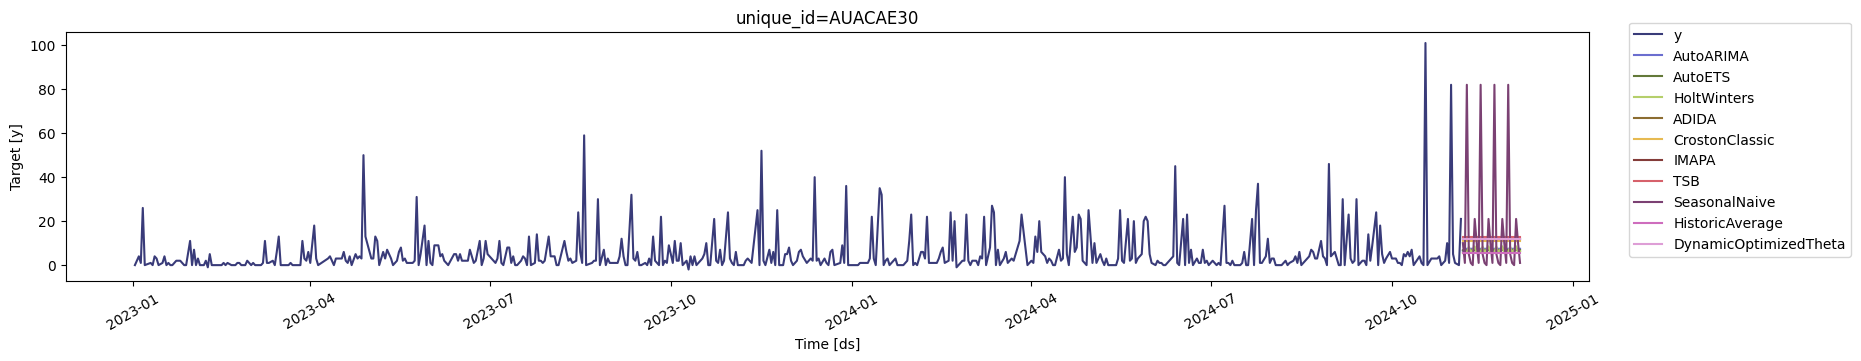

In [12]:
sf.plot(df_m,fcst_df)

In [13]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    col_bm = evaluation_df['best_model'].values[0]
    df = forecasts_df[col_bm] # Wide to long 
    df = df.reset_index(drop=False)
    df.columns = ['unique_id', 'best_model']
    return df

prod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, 
                                            evaluation_df = evaluation_df)
prod_forecasts_df.head()

,unique_id,best_model
0,AUACAE30,5.402174
1,AUACAE30,5.402174
2,AUACAE30,5.402174
3,AUACAE30,5.402174
4,AUACAE30,5.402174
